# Flight Price Prediction Project:

### STATEMENT: Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on
### 1. Time of purchase patterns (making sure last-minute purchases are expensive)
### 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
### So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

### Importing datasets:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all rows
pd.set_option('display.max_rows',None)

In [3]:
#importing dataset
df = pd.read_excel("flight_price.xlsx") #Reading xlsx file
df.head()

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
0,0,SpiceJet,Delhi,Mumbai,19:00,21:10,non-stop,02h 10m,"8,579",01/07/2022
1,1,SpiceJet,Delhi,Mumbai,07:20,09:35,non-stop,02h 15m,"8,579",01/07/2022
2,2,SpiceJet,Delhi,Mumbai,19:45,22:00,non-stop,02h 15m,"8,579",01/07/2022
3,3,GO FIRST,Delhi,Mumbai,08:00,10:10,non-stop,02h 10m,"8,578",01/07/2022
4,4,GO FIRST,Delhi,Mumbai,14:30,16:40,non-stop,02h 10m,"8,578",01/07/2022


Since Price is my target and it seems to be continuous feature so this perticular problem is Regression Problem.

## Features Information:

## Preprocessing and EDA:

In [4]:
#Checking shape of the dataset
df.shape

(2260, 10)

My dataset has 2260 rows and 10 columns.

In [5]:
#Checking all column names
df.columns

Index(['Unnamed: 0', 'Airline', 'Source', 'Destination', 'Depature Time',
       'Arrival Time', 'Stops', 'Duration', 'Price', 'Date'],
      dtype='object')

Above are the list of column names in the dataset.

In [6]:
#Checking for missing values
df.isnull().sum()

Unnamed: 0         0
Airline            0
Source             0
Destination        0
Depature Time      0
Arrival Time       0
Stops              0
Duration           0
Price            644
Date               0
dtype: int64

There are some entries like '-' and 'null' so let's replace these with nan.

In [7]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [8]:
#Checking for nan values again
df.isnull().sum()

Unnamed: 0         0
Airline            0
Source             0
Destination        0
Depature Time      0
Arrival Time       0
Stops              0
Duration           0
Price            644
Date               0
dtype: int64

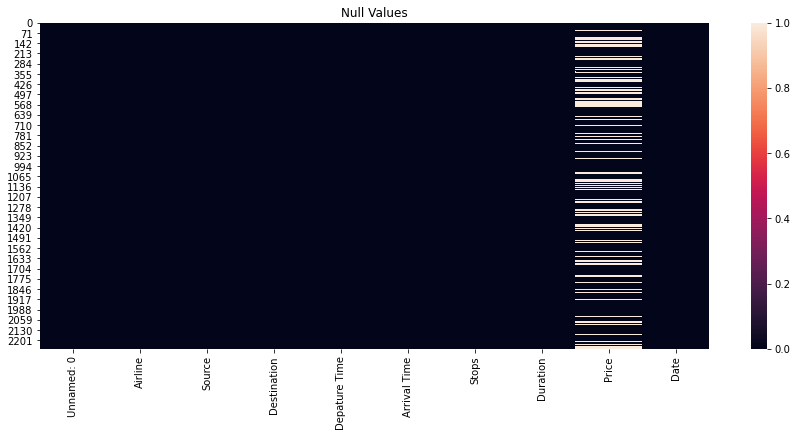

In [9]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is huge null values in the dataset.

In [10]:
import missingno as msno

<AxesSubplot:>

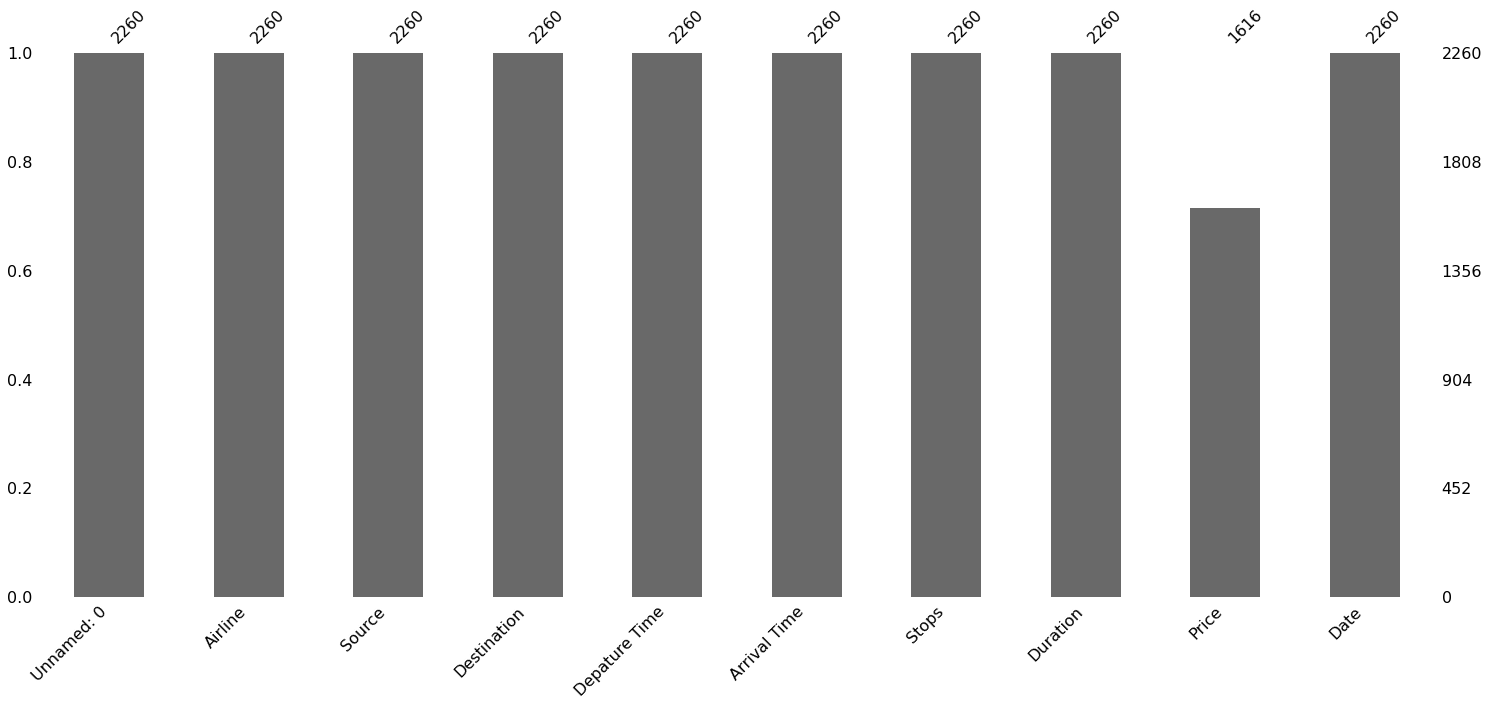

In [11]:
msno.bar(df)

In [12]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2260 non-null   int64 
 1   Airline        2260 non-null   object
 2   Source         2260 non-null   object
 3   Destination    2260 non-null   object
 4   Depature Time  2260 non-null   object
 5   Arrival Time   2260 non-null   object
 6   Stops          2260 non-null   object
 7   Duration       2260 non-null   object
 8   Price          1616 non-null   object
 9   Date           2260 non-null   object
dtypes: int64(1), object(9)
memory usage: 176.7+ KB


In [13]:
df.fillna(value = 0,
         inplace = True)
# Show the DataFrame
print(df)

      Unnamed: 0      Airline   Source Destination Depature Time Arrival Time  \
0              0     SpiceJet    Delhi      Mumbai         19:00        21:10   
1              1     SpiceJet    Delhi      Mumbai         07:20        09:35   
2              2     SpiceJet    Delhi      Mumbai         19:45        22:00   
3              3     GO FIRST    Delhi      Mumbai         08:00        10:10   
4              4     GO FIRST    Delhi      Mumbai         14:30        16:40   
5              5     GO FIRST    Delhi      Mumbai         10:55        13:10   
6              6     GO FIRST    Delhi      Mumbai         18:20        20:35   
7              7     GO FIRST    Delhi      Mumbai         22:45        01:00   
8              8     GO FIRST    Delhi      Mumbai         20:50        23:20   
9              9       Indigo    Delhi      Mumbai         02:10        04:10   
10            10       Indigo    Delhi      Mumbai         11:55        13:55   
11            11       Indig

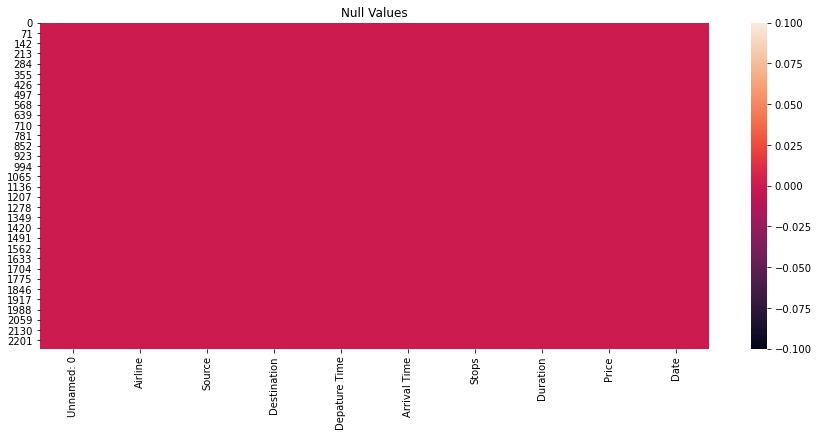

In [14]:
# check null value again
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [15]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

0       2
337     2
311     2
313     2
315     2
317     2
319     2
321     2
323     2
325     2
327     2
329     2
331     2
333     2
335     2
339     2
493     2
341     2
343     2
345     2
347     2
349     2
351     2
353     2
355     2
357     2
359     2
361     2
363     2
365     2
309     2
307     2
305     2
303     2
249     2
251     2
253     2
255     2
257     2
259     2
261     2
263     2
265     2
267     2
269     2
271     2
273     2
275     2
277     2
279     2
281     2
283     2
285     2
287     2
289     2
291     2
293     2
295     2
297     2
299     2
301     2
367     2
369     2
371     2
433     2
437     2
439     2
441     2
443     2
445     2
447     2
449     2
451     2
453     2
455     2
457     2
459     2
461     2
463     2
465     2
467     2
469     2
471     2
473     2
475     2
477     2
479     2
481     2
483     2
485     2
487     2
489     2
435     2
431     2
373     2
429     2
375     2
377     2
379     2
381     2


Above are the value counts of each column.In Airline and Stops column we have to use grouping to get better understanding on the feature.

In [16]:
#Grouping Stops column 

df["Stops"].replace(("1 stop via Jalgaon","1 stop via Mumbai","1 stop via Hyderabad","1 stop via Bengaluru","1 stop via New Delhi","1 stop via Ahmedabad","1 stop via Goa","1 stop via Pune","1 stop via Lucknow","1 stop via Ranchi","1 stop via Kolkata","1 stop via Chennai","1 stop via Chandigarh","1 stop via Kochi","1 stop via Jaipur","2 stop via New Delhi,Chennai","1 stop via Nagpur","1 stop via Amritsar","1 stop via Patna","1 stop via Surat","1 stop via Guwahati","1 stop via Vadodara","1 stop via Udaipur","1 stop via Indore","1 stop via Bhavnagar","1 stop via Madurai","1 stop via Bagdogra","1 stop via Varanasi","1 stop via Srinagar","1 stop via Mangalore","1 stop via Jammu","1 stop via Vijayawada","1 stop via Jodhpur","1 stop via Kalaburagi","1 stop via Aurangabad","1 stop via Rajkot","1 stop via Mysore","1 stop via Bhopal","1 stop via Tirupati","1 stop via Dehradun","1 stop via Visakhapatnam"),"1 Stop",inplace=True)


In [17]:
#Grouping Stops column
df["Stops"].replace(("2 stop via Surat,New Delhi","2 stop via Hyderabad,Vijayawada","2 stop via New Delhi,Hyderabad","2 stop via Hyderabad,New Delhi","2 stop via Mumbai,Hyderabad","2 stop via Mumbai,New Delhi","2 stop via Hyderabad,Mumbai","2 stop via Bengaluru,Hyderabad","2 stop via Hyderabad,Bengaluru","2 stop via New Delhi,Mumbai","2 stop via Varanasi,Bengaluru","2 stop via New Delhi,Chandigarh","2 stop via Chandigarh,New Delhi","2 stop via Chandigarh,Ahmedabad","2 stop via Ranchi,New Delhi","2 stop via Ranchi,Bengaluru","2 stop via Ahmedabad,Chandigarh","2 stop via Chandigarh,Srinagar","2 stop via Bengaluru,Ranchi","2 stop via Jammu,Srinagar","2 stop via Kochi,Mumbai","2 stop via New Delhi,Varanasi","2 stop via Hyderabad,Mysore","2 stop via Mumbai,Ranchi","2 stop via Chennai,Ranchi","2 stop via Hyderabad,Pune","2 stop via Nagpur,Pune","2 stop via Chennai,Hyderabad","2 stop via Pune,Hyderabad","2 stop via Hyderabad,Nanded","2 stop via Vijayawada,Hyderabad","2 stop via Hyderabad,Goa","2 stop via Nanded,Hyderabad","2 stop via Mumbai,Chandigarh","2 stop via Belgaum,Hyderabad","2 stop via Chennai,Jaipur","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Tirupati","2 stop via Srinagar,Chandigarh","2 stop via Mangalore,Mumbai","2 stop via Amritsar,Srinagar","2 stop via Goa,Hyderabad","2 stop via Mysore,Hyderabad","2 stop via New Delhi,Bhopal","2 stop via New Delhi,Bhopal","2 stop via Surat,Hyderabad","2 stop via Surat,Hyderabad","2 stop via Surat,Hyderabad","2 stop via New Delhi,Chennai"),"2 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("3 stop via Hyderabad,New Delhi,Amritsar","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Bengaluru,New Delhi,Indore","3 stop via Hyderabad,New Delhi,Chennai","3 stop via New Delhi,Indore,Mumbai","3 stop via New Delhi,Indore,Mumbai","3 stop via Goa,New Delhi,Hyderabad","3 stop via Mumbai,Aurangabad,New Delhi","3 stop via Chandigarh,New Delhi,Ranchi","3 stop via New Delhi,Aurangabad,Mumbai","3 stop via Leh,Jammu,Srinagar","3 stop via Bhubaneswar,New Delhi,Hyderabad","3 stop via Hyderabad,New Delhi,Mumbai","3 stop via Indore,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Jaipur","3 stop via Hyderabad,New Delhi,Goa","3 stop via Ahmedabad,New Delhi,Hyderabad","3 stop via Belgaum,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Bhopal","3 stop via Mumbai,New Delhi,Hyderabad"),"3 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("4 stop via Patna,Kolkata,New Delhi,Hyderabad","4 stop via Hyderabad,New Delhi,Surat,Bhubaneswar","4 stop via Mysore,Kochi,New Delhi,Hyderabad","4 stop via Hyderabad,New Delhi,Raipur,Visakhapatnam","4 stop via Nasik,Pune,Bhopal,New Delhi","4 stop via Bhubaneswar,Surat,New Delhi,Hyderabad","4 stop via Nasik,Pune,New Delhi,Hyderabad"),"4 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("5 stop via Hyderabad,New Delhi,Nagpur,Raipur,Visakhapatnam"),"5 Stops",inplace=True)

In [18]:
#Checking the value counts of Stops column
df.Stops.value_counts()

1-stop               1450
non-stop              483
2+-stop               277
1-stop Via IXU         21
1-stop Via Indore      17
1-stop Via IDR          8
1-stop Via Bhopal       2
1-stop Via CNN          2
Name: Stops, dtype: int64

In [19]:
#Let me assign values for Stops column
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2,"3 Stops": 3,"4 Stops": 4,"5 Stops": 5 },inplace = True)

In [20]:
#Checking the value counts of Stops column again
df.Stops.value_counts()

1-stop               1450
non-stop              483
2+-stop               277
1-stop Via IXU         21
1-stop Via Indore      17
1-stop Via IDR          8
1-stop Via Bhopal       2
1-stop Via CNN          2
Name: Stops, dtype: int64

In [21]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Unnamed: 0       0
Airline          0
Source           0
Destination      0
Depature Time    0
Arrival Time     0
Stops            0
Duration         0
Price            0
Date             0
dtype: int64


### Feature Extraction:

In [22]:
#Converting object data type to datetime in Journey_date column 
df['Journey_date'] =  pd.to_datetime(df['Date'])

#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

In [23]:
#Checking valuecount of Journey_year column
df.Journey_year.value_counts()

2022    2260
Name: Journey_year, dtype: int64

Since all the entries in Journey_year column are same let's drop as it will not help in our core analysis.

In [24]:
#Droping Journey_year column
df = df.drop(["Journey_year"],axis=1)


#Checking valuecount of Journey_mon column
df.Journey_mon.value_counts()

2    1267
1     993
Name: Journey_mon, dtype: int64

Since all the entries in Journey_mon column are same let's drop as it will not help in our core analysis.

In [25]:
#Droping Journey_mon column
df = df.drop(["Journey_mon"],axis=1)


#Checking valuecount of Journey_year column
df.Journey_day.value_counts()

7    2260
Name: Journey_day, dtype: int64

Now Journey_day is ready for our analysis.

In [26]:
#Droping Journey_date column
df = df.drop(["Journey_date"],axis=1)

Dropping Journey_date column after extracting requered information.

In [27]:
#Converting object data type to datetime 
df['Depature Time'] =  pd.to_datetime(df['Depature Time'])
df['Arrival Time'] =  pd.to_datetime(df['Arrival Time'])


#Checking the data types of all columns again
df.dtypes

Unnamed: 0                int64
Airline                  object
Source                   object
Destination              object
Depature Time    datetime64[ns]
Arrival Time     datetime64[ns]
Stops                    object
Duration                 object
Price                    object
Date                     object
Journey_day               int64
dtype: object

In [28]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Depature Time"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Depature Time"]).dt.minute


#Droping Dep_Time column after extraction
df = df.drop(["Depature Time"],axis=1)

In [29]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["AHour"]=pd.to_datetime(df["Arrival Time"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Arrival Time"]).dt.minute


#Droping Arrival_Time column after extraction
df = df.drop(["Arrival Time"],axis=1)

In [30]:
#Checking the data types of all columns again
df.dtypes

Unnamed: 0      int64
Airline        object
Source         object
Destination    object
Stops          object
Duration       object
Price          object
Date           object
Journey_day     int64
Dhour           int64
DMin            int64
AHour           int64
AMin            int64
dtype: object

Datatypes after extraction and pre-processing

In [31]:
#Checking description of data set
df.describe()

,Unnamed: 0,Journey_day,Dhour,DMin,AHour,AMin
count,2260.000000,2260.0,2260.000000,2260.000000,2260.000000,2260.000000
mean,572.804867,7.0,12.981858,25.424779,14.067257,28.995575
std,340.257266,0.0,5.434884,17.680232,6.431846,17.915002
min,0.000000,7.0,0.000000,0.000000,0.000000,0.000000
25%,282.000000,7.0,8.000000,10.000000,9.000000,15.000000
50%,564.500000,7.0,13.000000,25.000000,15.000000,30.000000
75%,847.000000,7.0,18.000000,40.000000,19.000000,45.000000
max,1266.000000,7.0,23.000000,55.000000,23.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

## Visualization:

## Univariate Analysis:

In [32]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Stops', 'Duration', 'Price', 'Date']


In [33]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Unnamed: 0', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


## Univariate analysis for numerical columns:

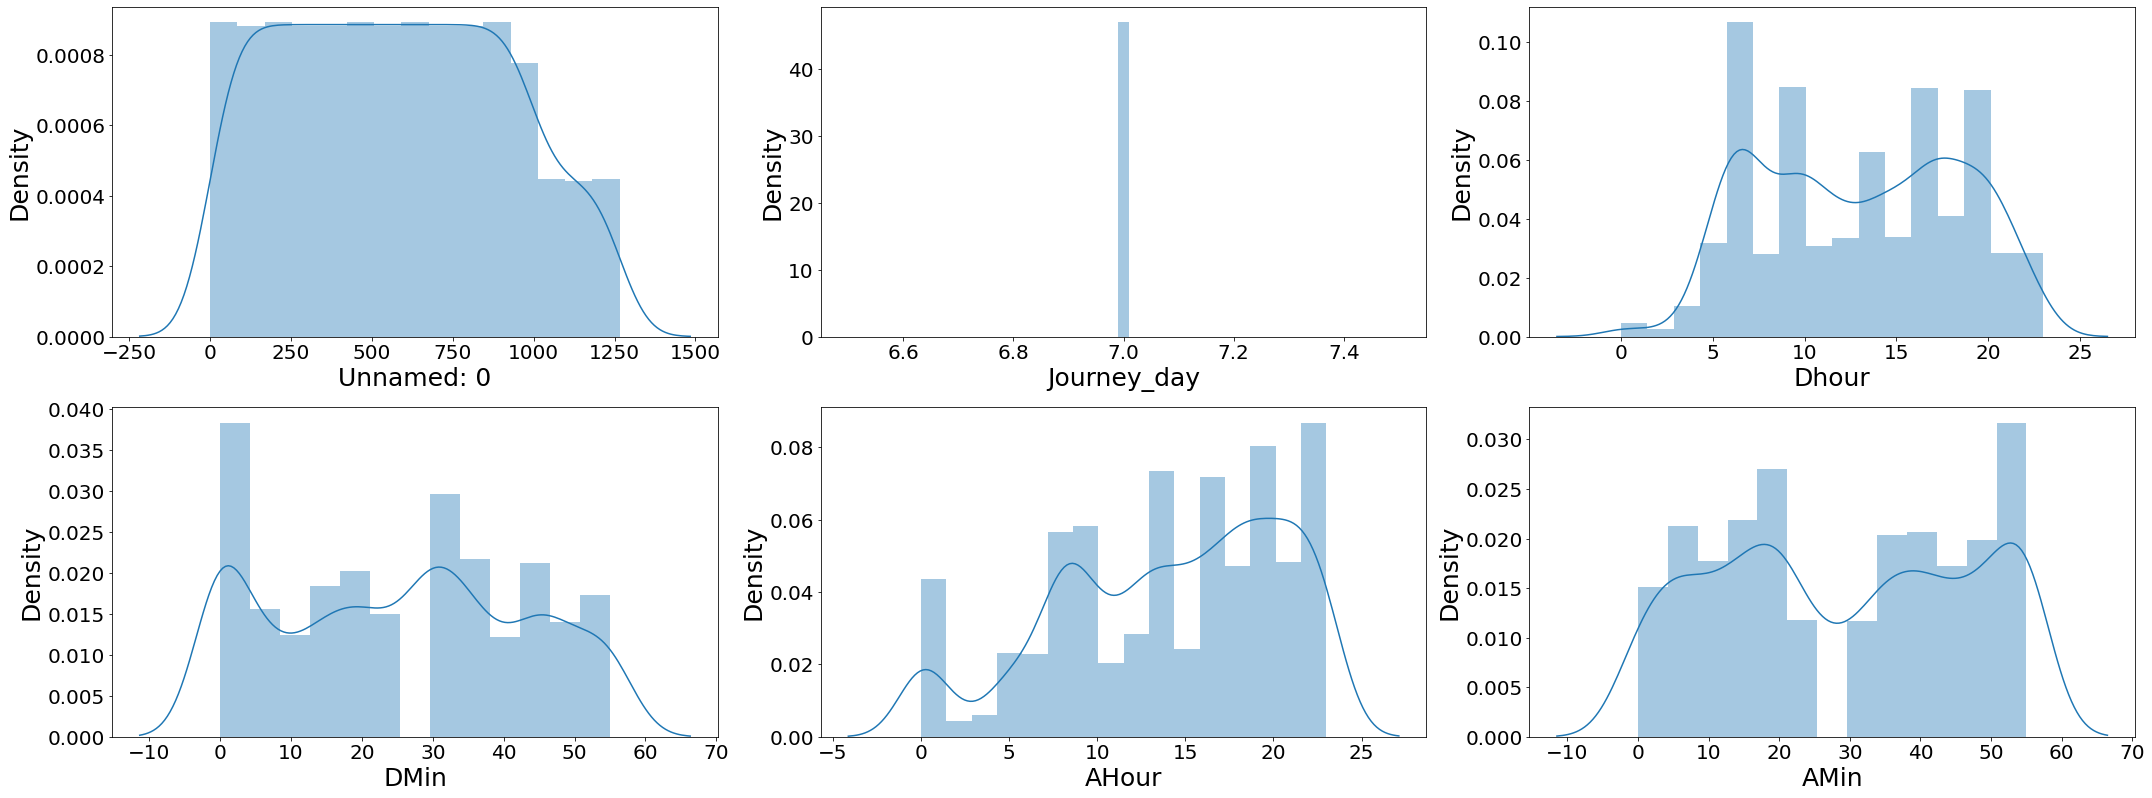

In [34]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no skewness in any of the numerical columns.

### Univariate Analysis for categorical columns:

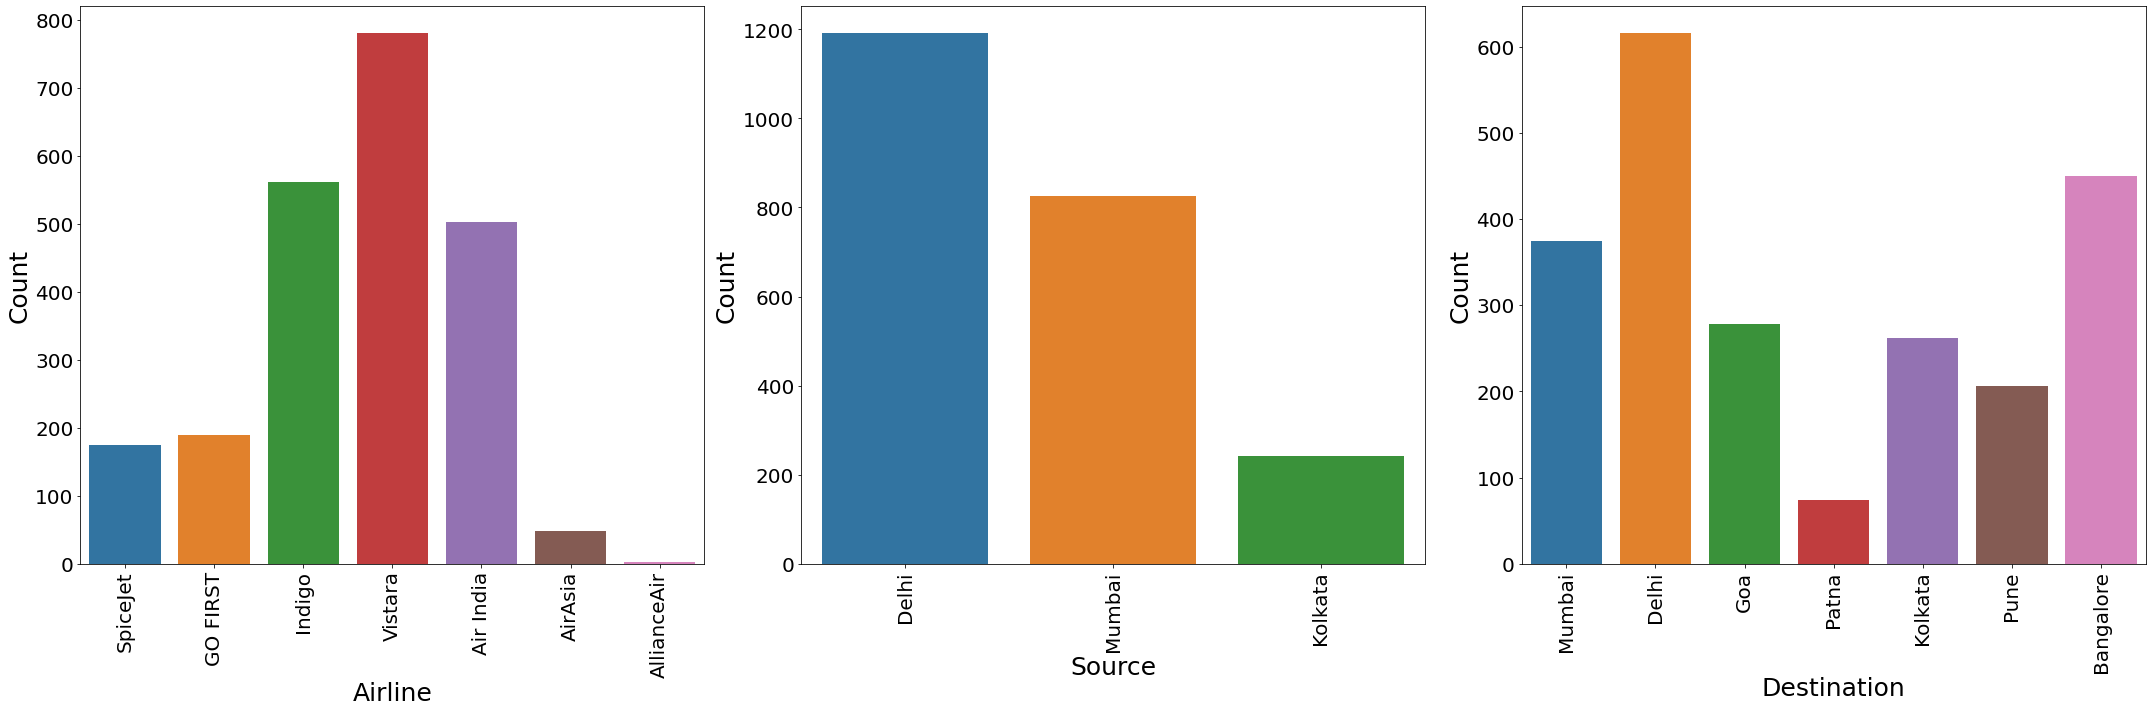

In [35]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

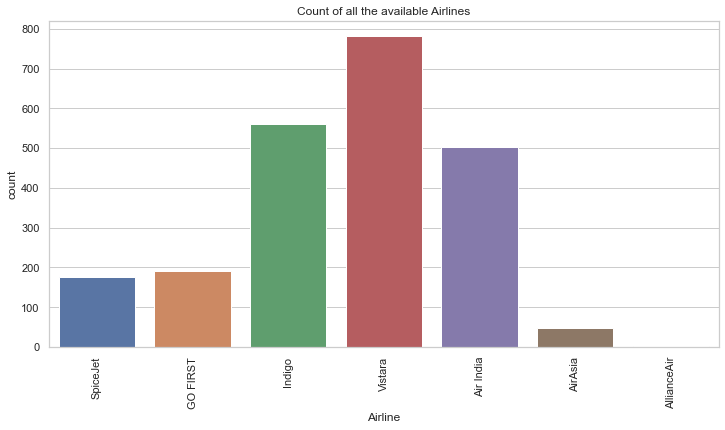

In [36]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Airline", data=df).set(title='Count of all the available Airlines') 
plt.xticks(rotation=90)
plt.show

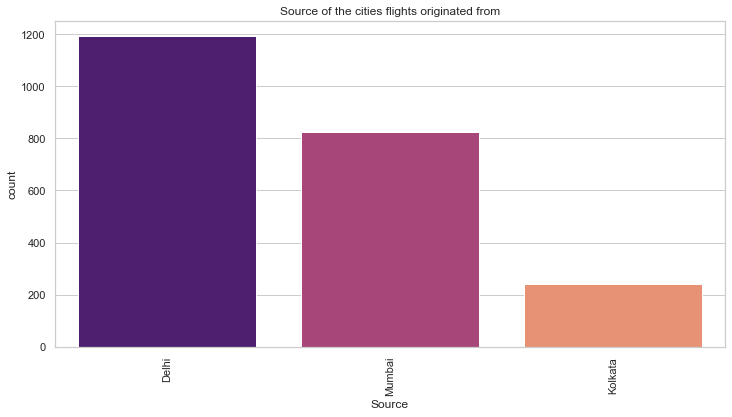

In [37]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Source", data=df, palette= "magma").set(title='Source of the cities flights originated from') 
plt.xticks(rotation=90)
plt.show()

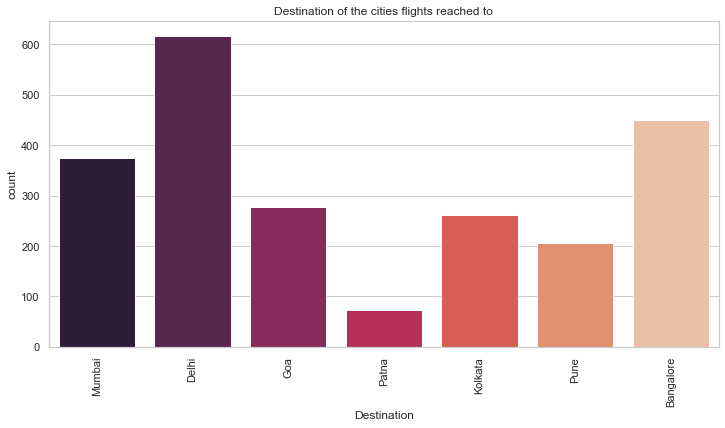

In [38]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Destination", data=df, palette= "rocket").set(title='Destination of the cities flights reached to') 
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis:

In [39]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

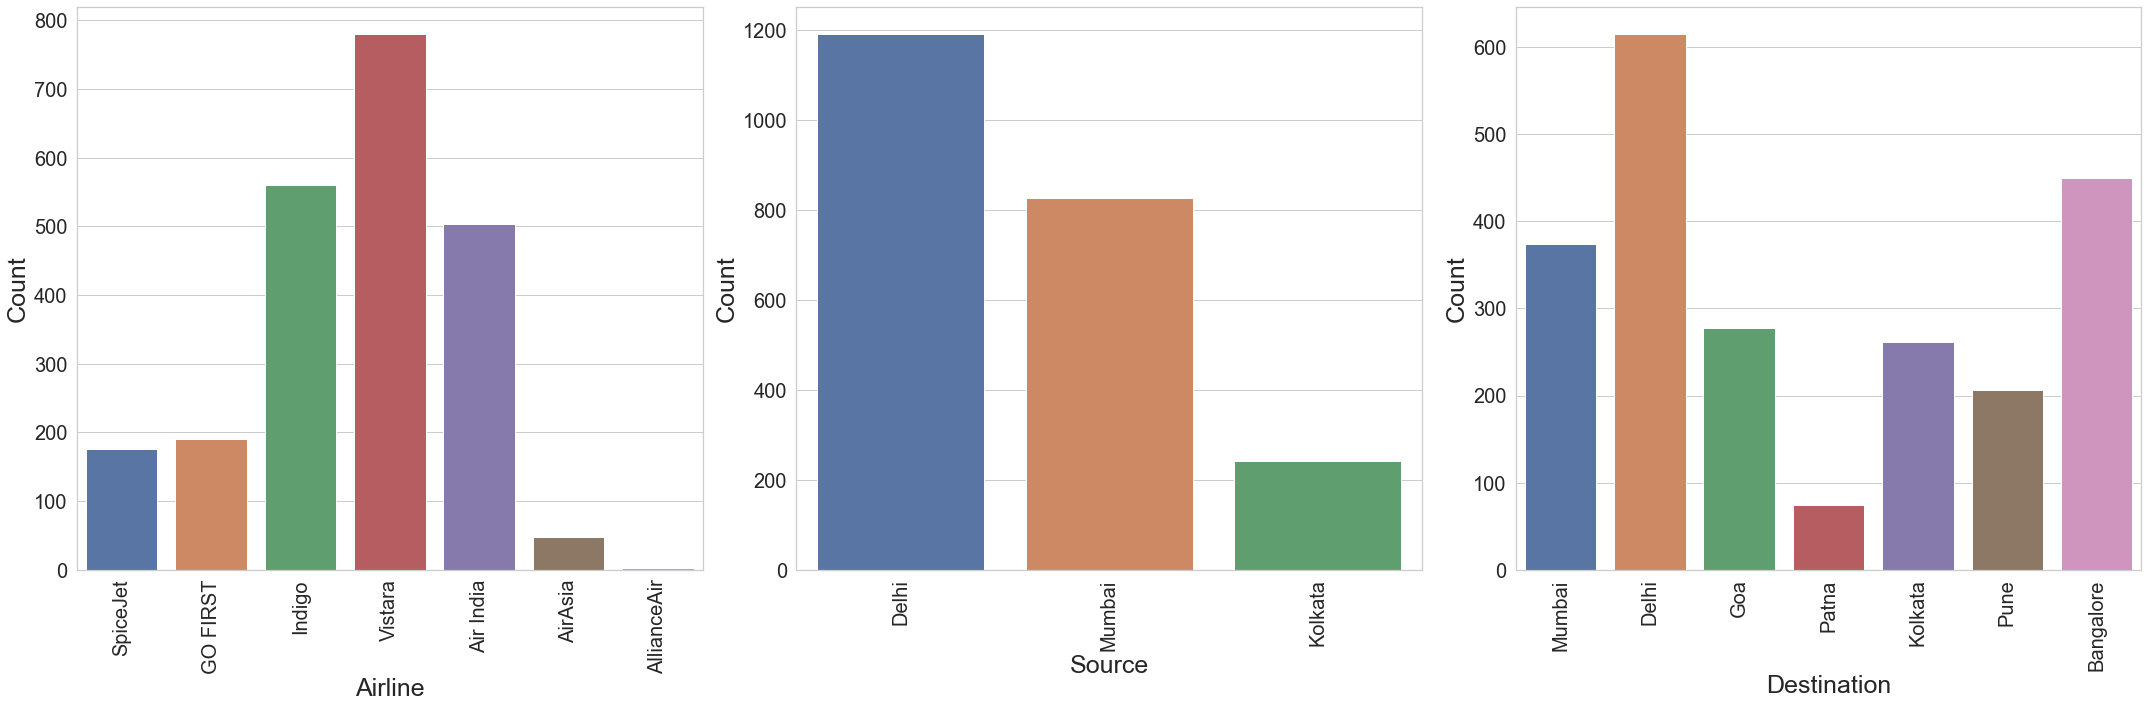

In [40]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
sns.set_theme(style="whitegrid")
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Multivariate Analysis:

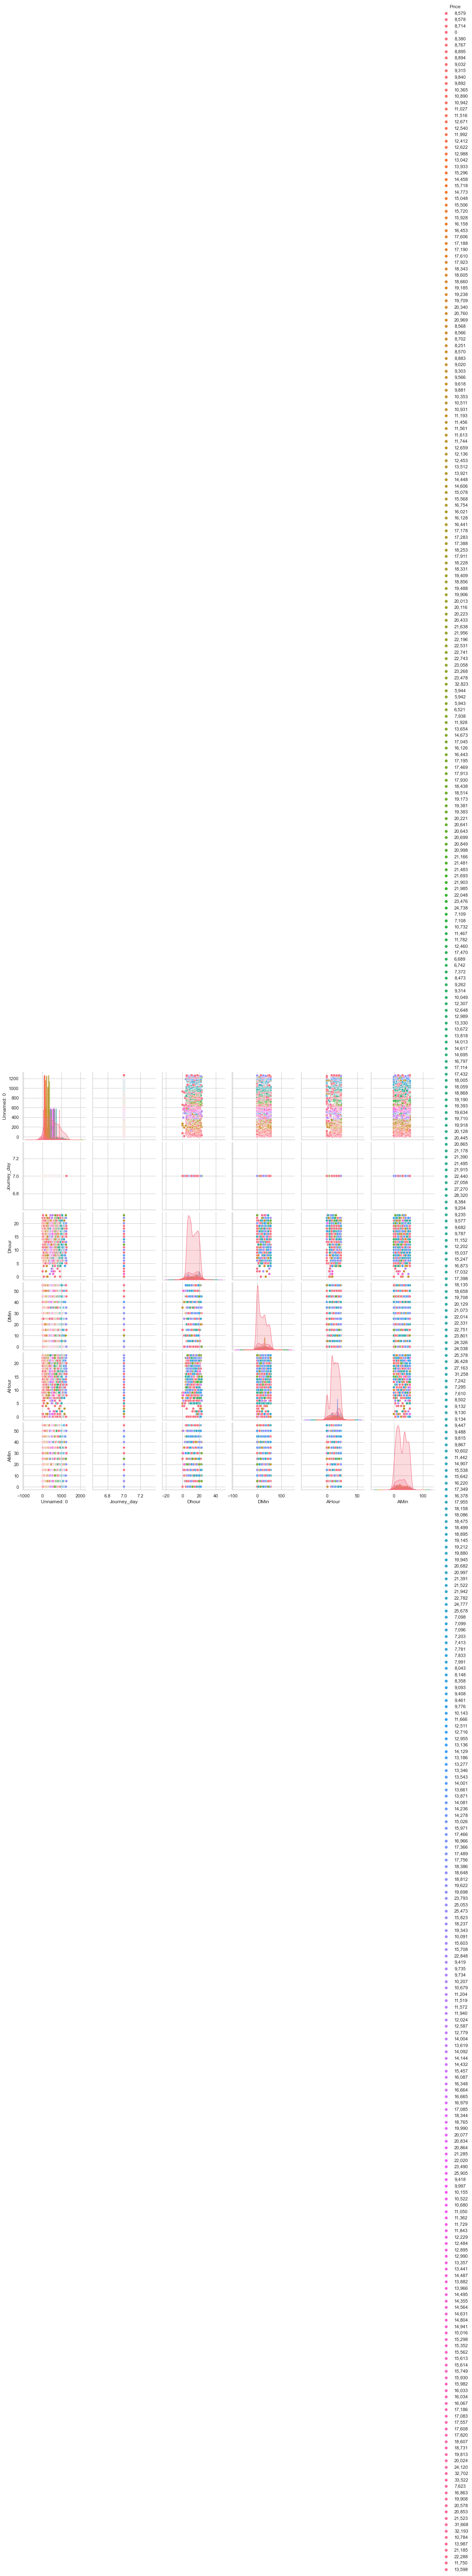

In [41]:
#pair ploting for df
sns.pairplot(df,hue="Price")

Above are the pair plots of each pair of features.

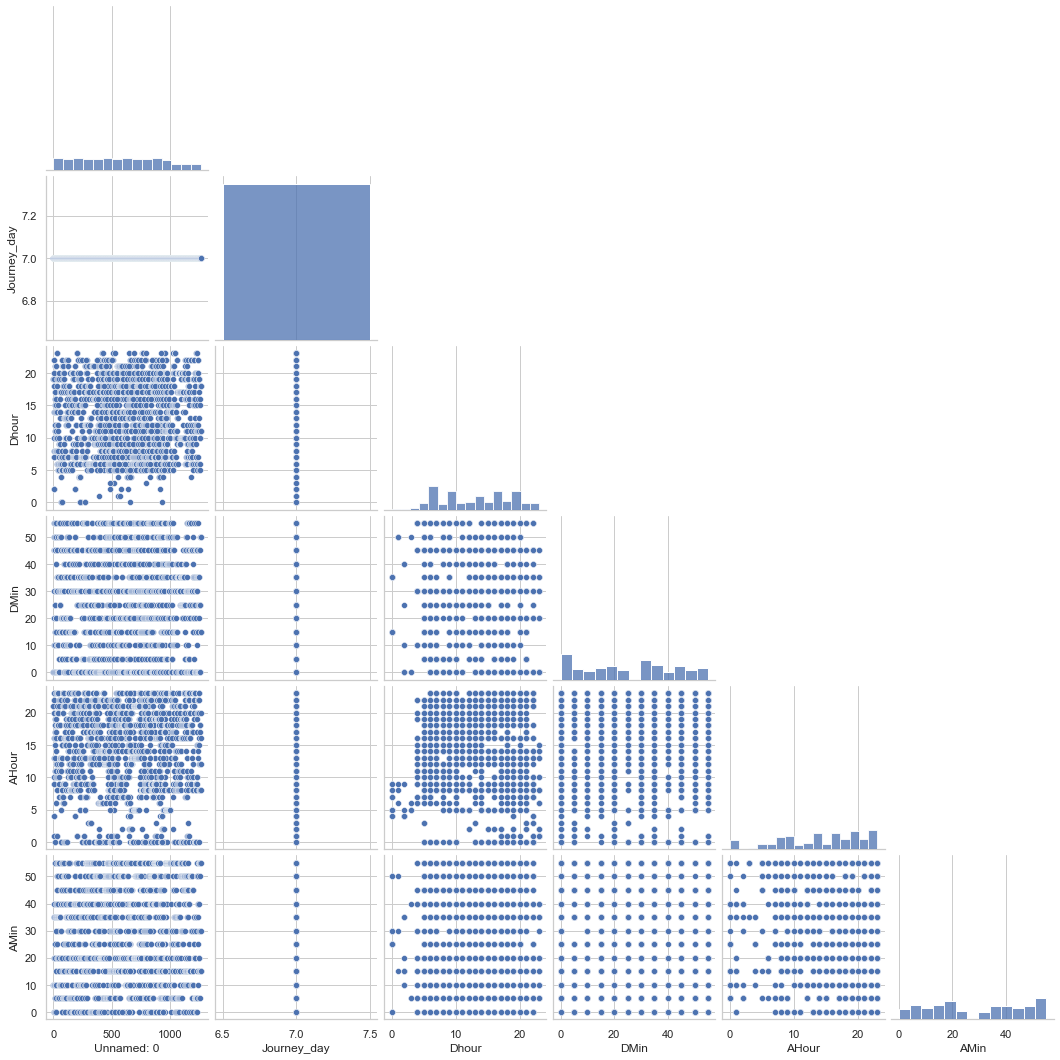

In [42]:
sns.pairplot(df, corner=True)

Above are the pair plots of each pair of features.

## Checking for outliers:

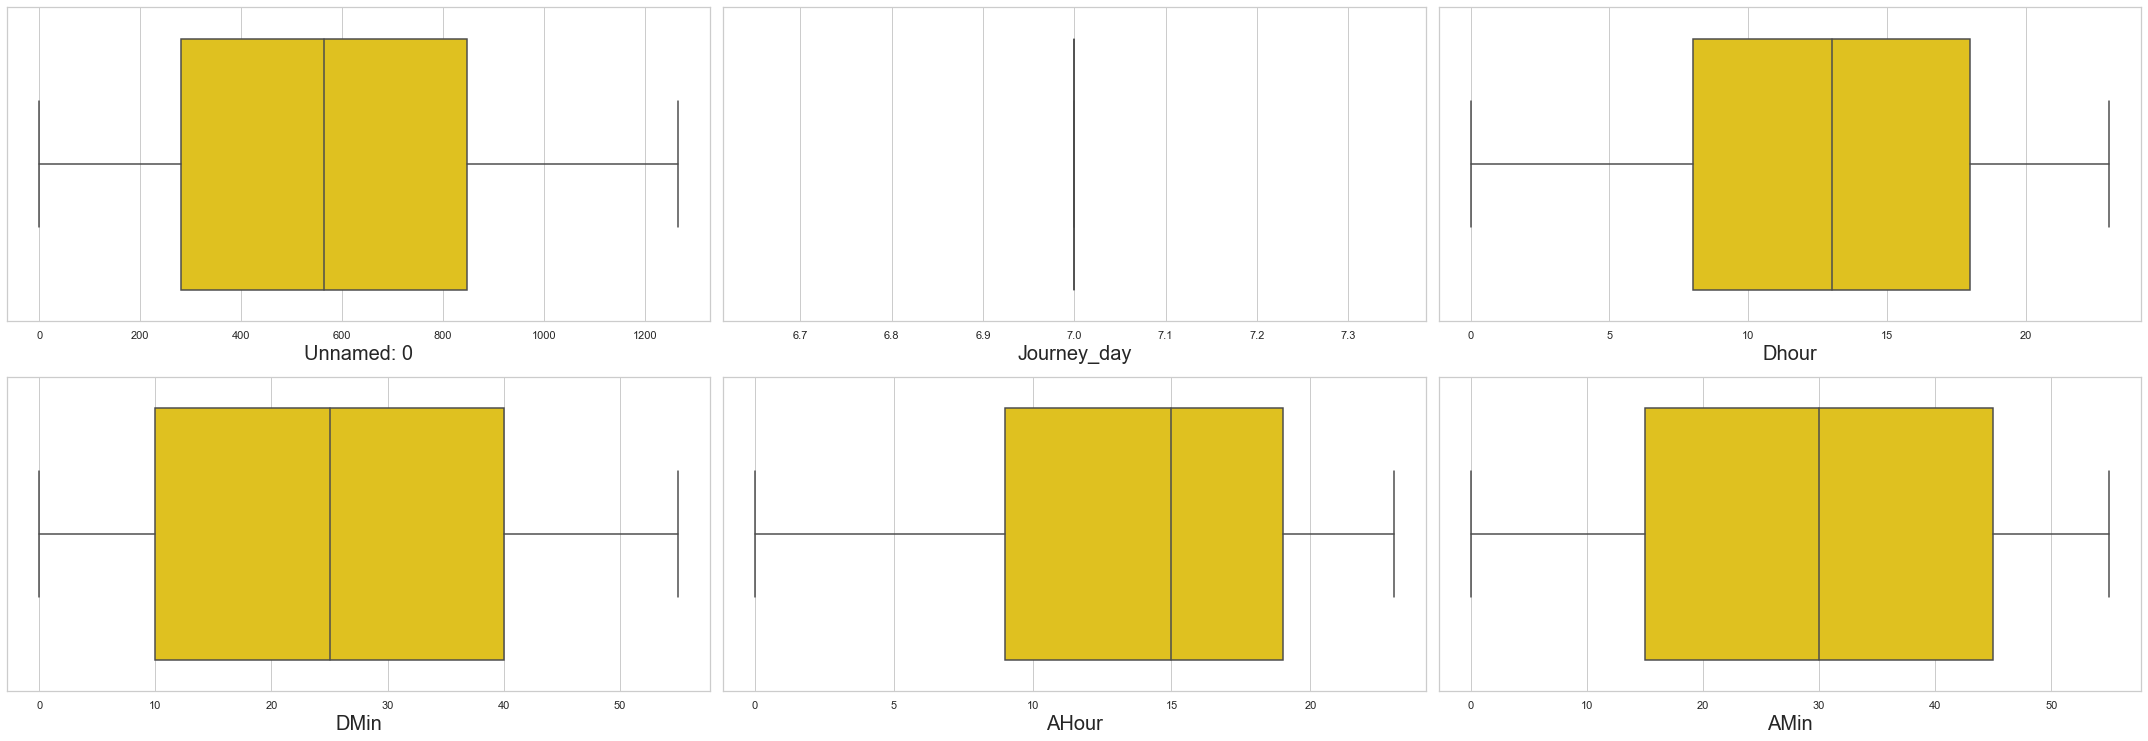

In [43]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Checking for skewness:

In [44]:
#Checking for skewness
df.skew()

Unnamed: 0     0.130843
Journey_day    0.000000
Dhour         -0.027349
DMin           0.032586
AHour         -0.496731
AMin          -0.013622
dtype: float64

There is skewness in Stops and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated. And Stops is categorical column so i should not remove skewness here also.

### Label Encoding:

In [45]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Stops', 'Duration', 'Price', 'Date']


In [46]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder

num= LabelEncoder()

label_col = ['Airline', 'Source', 'Destination', 'Stops', 'Price']

for x in label_col:
    df[x] = num.fit_transform(df[x].astype(str))
    
df.head()

,Unnamed: 0,Airline,Source,Destination,Stops,Duration,Price,Date,Journey_day,Dhour,DMin,AHour,AMin
0,0,5,0,4,7,02h 10m,362,01/07/2022,7,19,0,21,10
1,1,5,0,4,7,02h 15m,362,01/07/2022,7,7,20,9,35
2,2,5,0,4,7,02h 15m,362,01/07/2022,7,19,45,22,0
3,3,3,0,4,7,02h 10m,361,01/07/2022,7,8,0,10,10
4,4,3,0,4,7,02h 10m,361,01/07/2022,7,14,30,16,40


Using label encoder i have encoded the categorical columns.

[0.00818584 0.00106195 0.00129425 0.00112832 0.00190265 0.00147124
 0.00126106 0.00127212 0.00238938 0.00503319]
[  0.  40.  80. 120. 160. 200. 240. 280. 320. 360. 400.]


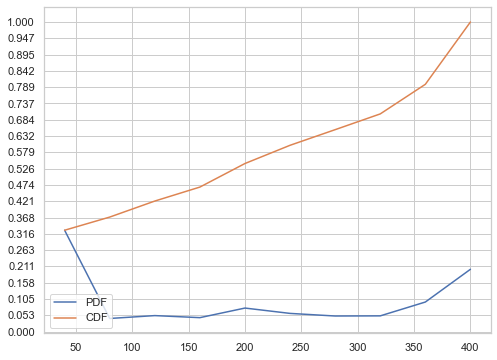

In [47]:
df_Price=df.loc[:,"Price"]
count,bin_edges=np.histogram(df_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

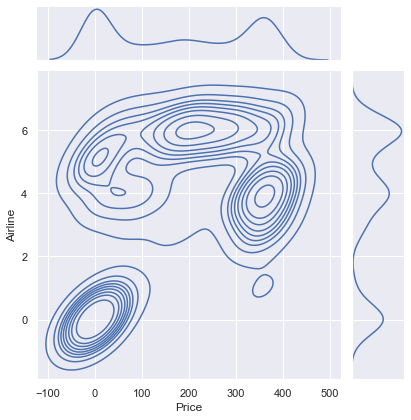

In [48]:
sns.set_style("darkgrid")
sns.jointplot("Price","Airline",data=df,kind="kde")
plt.show()

In [49]:
from scipy.stats import zscore

z_score = zscore(df[['Price','Source','Destination']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]


# the data now seems much better than before.

df.describe()

,Unnamed: 0,Airline,Source,Destination,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.0,2260.000000,2260.000000,2260.000000,2260.000000
mean,572.804867,3.728761,0.838053,2.238938,2.319469,177.451770,7.0,12.981858,25.424779,14.067257,28.995575
std,340.257266,2.286548,0.931170,1.882678,3.143558,149.648225,0.0,5.434884,17.680232,6.431846,17.915002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.0,0.000000,0.000000,0.000000,0.000000
25%,282.000000,3.000000,0.000000,1.000000,0.000000,0.000000,7.0,8.000000,10.000000,9.000000,15.000000
50%,564.500000,4.000000,0.000000,2.000000,0.000000,179.000000,7.0,13.000000,25.000000,15.000000,30.000000
75%,847.000000,6.000000,2.000000,4.000000,6.000000,341.000000,7.0,18.000000,40.000000,19.000000,45.000000
max,1266.000000,6.000000,2.000000,6.000000,7.000000,400.000000,7.0,23.000000,55.000000,23.000000,55.000000


### Checking correlation using heat map:

In [50]:
#Droping Journey_date column
df = df.drop(["Journey_day"],axis=1)

In [51]:
df = df.drop(['Duration'],axis =1)

In [52]:
df = df.drop(['Date'],axis = 1)

In [53]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price          1.000000
Airline        0.483703
Stops          0.258435
DMin           0.122637
Destination    0.088951
AHour          0.052836
AMin           0.043884
Dhour          0.038033
Unnamed: 0    -0.030149
Source        -0.044639
Name: Price, dtype: float64

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

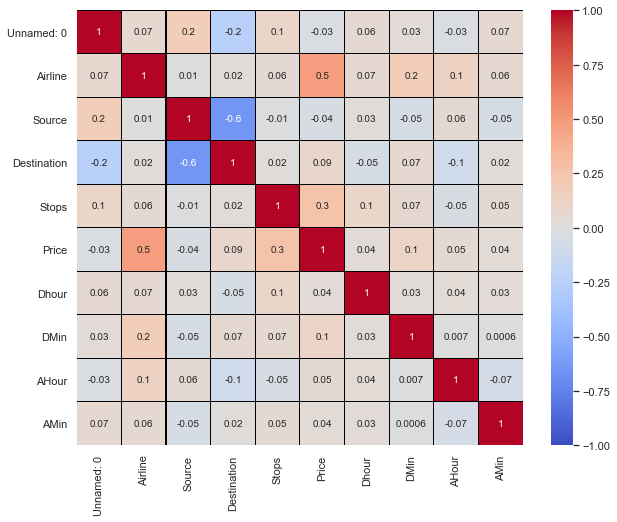

In [54]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

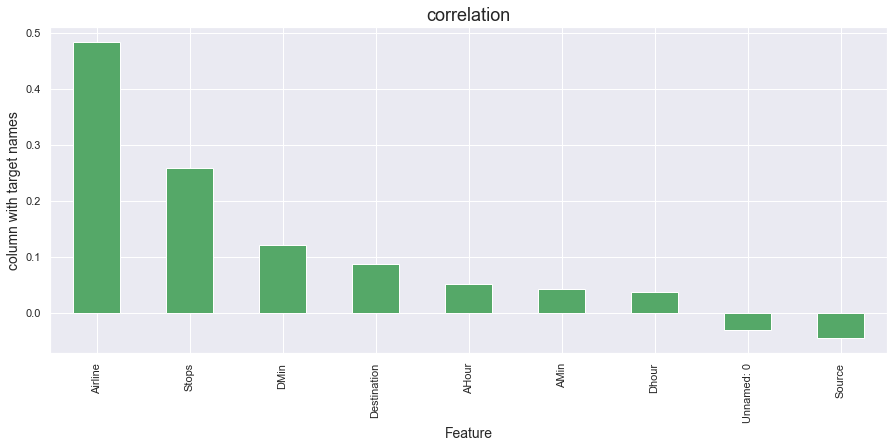

In [55]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Separating features and label in train dataset:

In [56]:
x = df.drop("Price",axis=1)
y = df["Price"]

### Scaling the data using standard scaler:

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X.head()

,Unnamed: 0,Airline,Source,Destination,Stops,Dhour,DMin,AHour,AMin
0,-1.683819,0.556087,-0.900199,0.93561,1.489257,1.107562,-1.438352,1.078116,-1.060551
1,-1.680879,0.556087,-0.900199,0.93561,1.489257,-1.100885,-0.306895,-0.788013,0.335236
2,-1.677940,0.556087,-0.900199,0.93561,1.489257,1.107562,1.107426,1.233627,-1.618866
3,-1.675000,-0.318787,-0.900199,0.93561,1.489257,-0.916848,-1.438352,-0.632502,-1.060551
4,-1.672061,-0.318787,-0.900199,0.93561,1.489257,0.187376,0.258833,0.300562,0.614393


### Checking for multicolinearity issue using VIF:

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.099174,Unnamed: 0
1,1.074325,Airline
2,1.729059,Source
3,1.800827,Destination
4,1.032637,Stops
5,1.021380,Dhour
6,1.043741,DMin
7,1.046207,AHour
8,1.019647,AMin


There is no multicolinearity issue in this dataset.

### Finding Best Random State and Accuracy:

In [59]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9187598435325643  on Random_state  185


In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)
# Created train test split.

## Regression Algorithms:

In [62]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

## RandomForestRegressor:

In [63]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 91.28932641391731
mean_squared_error: 1929.2517662241887
mean_absolute_error: 21.825442477876106
root_mean_squared_error: 43.923248584595704


## ExtraTreeRegressor:

In [64]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9150272905789147
mean_squared_error: 1881.9870600294985
mean_absolute_error: 17.782581120943952
root_mean_squared_error: 43.38187478693721


## Gradient Boosting Regressor:

In [65]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8099680487753101
mean_squared_error: 4208.85335578435
mean_absolute_error: 43.52111282761848
root_mean_squared_error: 64.87567614895701


## DecisionTreeRegressor:

In [66]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8498653045197262
mean_squared_error: 3325.2035398230087
mean_absolute_error: 17.073746312684367
root_mean_squared_error: 57.66457786044227


## KNN:

In [67]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.5740266111957524
mean_squared_error: 9434.51622418879
mean_absolute_error: 64.21297935103244
root_mean_squared_error: 97.13143787769637


## Bagging Regressor:

In [68]:
BG=BaggingRegressor()
BG.fit(X_train,y_train)
pred=BG.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8963079966637146
mean_squared_error: 2296.584513274336
mean_absolute_error: 23.15457227138643
root_mean_squared_error: 47.92269309287966


In [69]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(DTR, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(RFR, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(ETR, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.4525408340668454
Cross Validation score of RandomForestRegressor model is: 0.7077323343164922
Cross Validation score of ExtraTreesRegressor model is: 0.8201903135586122


In [70]:
scr = cross_val_score(GBR, x, y, cv=5)
print("Cross Validation score of GradientBoostingRegressor model is:", scr.mean())

scr = cross_val_score(BG, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of GradientBoostingRegressor model is: 0.6423831958502506
Cross Validation score of KNeighborsRegressor model is: 0.6825476426134864


## Hyper Parameter Tuning:

In [71]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [72]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
RCV = RandomizedSearchCV(ExtraTreesRegressor(), parameter, cv=5, n_iter=10)
RCV.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [20, 40, 60, 80, 100],
                                        'n_jobs': [-2, -1, 1, 2]})

In [75]:
RCV.best_params_

{'n_jobs': 1,
 'n_estimators': 20,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

## New Model

In [76]:
Best_mod=ExtraTreesRegressor(max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=80,n_jobs=1)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 88.3525800755326
mean_squared_error: 2579.6863169268413
mean_absolute_error: 25.63804966343268
RMSE value: 50.79061248820338


## Saving New Model:

In [77]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

### Predicting Flight Price for test dataset using Saved model of trained dataset:

In [78]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([  0.        , 110.35104167, 341.68541667,   0.        ,
       342.03020833, 362.17708333, 241.82479167,   0.        ,
       218.69494048,   0.        , 347.00520833, 291.94278409,
       334.41979167, 194.49479167,  72.115625  , 335.71488095,
       197.80020833,   0.        , 132.26041667, 178.98770833,
         0.        ,   0.        , 330.        , 365.70416667,
        61.50520833,  79.32083333, 190.09470238, 121.80104167,
         0.        ,   0.        ,   0.        ,  92.75      ,
       182.40416667, 158.10041667, 130.42083333,   0.        ,
       112.29717262, 270.04791667, 198.434375  ,   0.        ,
       240.53488095, 280.59791667, 365.15416667, 255.44458333,
       148.16354167,   0.        , 319.225     ,  87.77708333,
       367.09145833, 329.490625  ,   0.        , 183.96770833,
       160.03125   , 192.16041667, 360.7625    ,   0.        ,
         0.        ,   0.        , 135.73729167, 340.49270833,
       284.44166667,   0.        ,   0.        , 212.61

In [79]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,672,673,674,675,676,677
Predicted,0.0,110.351042,341.685417,0.0,342.030208,362.177083,241.824792,0.0,218.69494,0.0,...,0.0,346.873333,0.0,0.0,350.086458,182.505208,0.0,10.334375,0.0,0.0
Actual,0.0,117.000000,396.000000,0.0,357.000000,362.000000,252.000000,0.0,217.00000,0.0,...,0.0,358.000000,0.0,0.0,356.000000,181.000000,0.0,0.000000,0.0,0.0


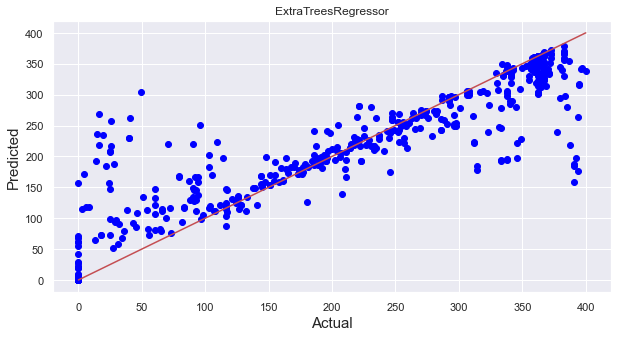

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='blue')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Red line is the actual line and blue dots are the predicted values.